In [1]:
import pandas as pd
import numpy as np
import csv
import pickle
from collections import Counter
import matplotlib.pyplot as plt
import powerlaw,math
import os

In [2]:
files = os.listdir('./fig1')

In [3]:
files_csv = [k for k in files if k.endswith('csv')]
files_csv

['no_mentee_mentor_y_physics0119.csv',
 'no_mentee_mentor_y_neuro0119.csv',
 'no_mentee_mentor_y_chemistry0119.csv']

In [4]:
files_csv = ['no_mentee_mentor_y_chemistry0123.csv','no_mentee_mentor_y_physics0123.csv','no_mentee_mentor_y_neuro0123.csv']

In [5]:
#带学生的表现差异及非参数检验结果
test_res = {'chemistry':{'allBig':4.15, 'allSmall':2.67, 'survivalBig':8.71, 'survivalSmall':4.46,
                         'a_SD0':0.06,'a_SD1':0.14,'b_SD0':0.09,'b_SD1':0.26},
       'physics':{'allBig':1.41, 'allSmall':2.00, 'survivalBig':4.48, 'survivalSmall':3.35,
                 'a_SD0':0.06,'a_SD1':0.09,'b_SD0':0.09,'b_SD1':0.24},
        'neuro':{'allBig':2.28, 'allSmall':3.04, 'survivalBig':6.31, 'survivalSmall':5.07,
                'a_SD0':0.07,'a_SD1':0.13,'b_SD0':0.10,'b_SD1':0.29}}
#         'math':{'allBig':0.95, 'allSmall':2.06, 'survivalBig':4.32, 'survivalSmall':4.01,
#                'a_SD0':0.14,'a_SD1':0.24,'b_SD0':0.18,'b_SD1':0.75}}
test_res = pd.DataFrame(test_res)
print(test_res)

               chemistry  physics  neuro
allBig              4.15     1.41   2.28
allSmall            2.67     2.00   3.04
survivalBig         8.71     4.48   6.31
survivalSmall       4.46     3.35   5.07
a_SD0               0.06     0.06   0.07
a_SD1               0.14     0.09   0.13
b_SD0               0.09     0.09   0.10
b_SD1               0.26     0.24   0.29


In [6]:
#年均引用的表现差异及非参数检验结果
test_res1 = {'chemistry':{'allBig':180, 'allSmall':229, 'survivalBig':290, 'survivalSmall':267,
                         'a_SD0':4.0,'a_SD1':5.4,'b_SD0':5.1,'b_SD1':9.2},
       'physics':{'allBig':150, 'allSmall':204, 'survivalBig':281, 'survivalSmall':234,
                 'a_SD0':5.8,'a_SD1':9.0,'b_SD0':7.4,'b_SD1':19.7},
        'neuro':{'allBig':363, 'allSmall':465, 'survivalBig':644, 'survivalSmall':552,
                'a_SD0':10,'a_SD1':22,'b_SD0':14,'b_SD1':50}}
#         'math':{'allBig':0.95, 'allSmall':2.06, 'survivalBig':4.32, 'survivalSmall':4.01,
#                'a_SD0':0.14,'a_SD1':0.24,'b_SD0':0.18,'b_SD1':0.75}}
test_res1 = pd.DataFrame(test_res1)
print(test_res1)

               chemistry  physics  neuro
allBig             180.0    150.0    363
allSmall           229.0    204.0    465
survivalBig        290.0    281.0    644
survivalSmall      267.0    234.0    552
a_SD0                4.0      5.8     10
a_SD1                5.4      9.0     22
b_SD0                5.1      7.4     14
b_SD1                9.2     19.7     50


In [7]:
n_smallGroup = test_res['chemistry']['allBig']

In [8]:
n_smallGroup

4.15

In [9]:
import seaborn as sns

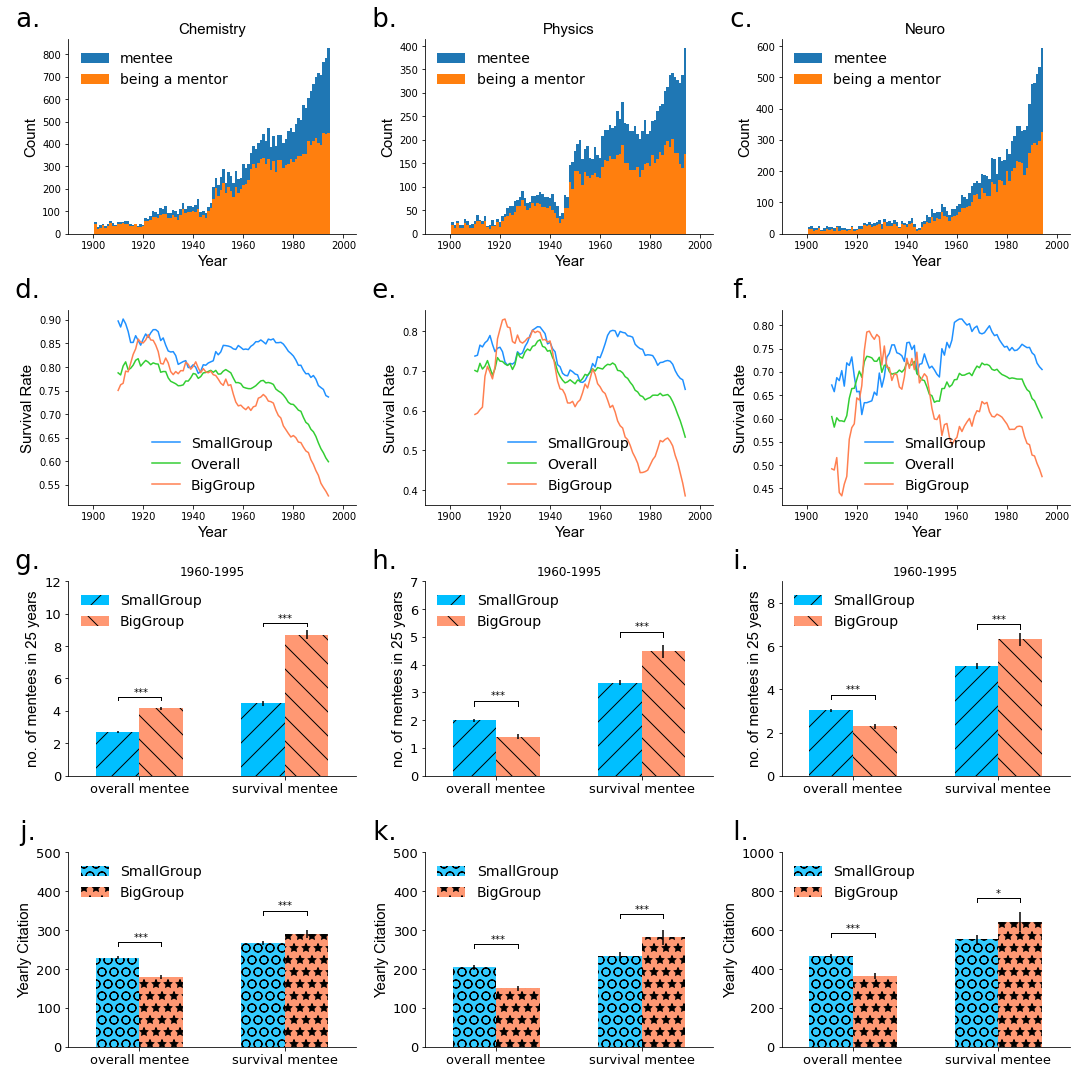

In [18]:
font = { 'weight': 'normal',
         'size': 15,
        'family':'Arial'
         }
fig = plt.figure(figsize=(15,15))#figsize=(10,3.5)
Titles = ['Chemistry','Physics','Neuro']
l_index = [' a. ',' b. ',' c. ',' d. ',' e. ',' f. ',' g. ',' h. ',' i. ',' j. ',' k. ',' l. ']
#  

#第一行：学生数和成为老师的学生数
for i in range(1,4):
    no_mentee_mentor_y = pd.read_csv(files_csv[i-1])
    ax = fig.add_subplot(4,3,i)                           #选择第几幅图片
    ax.bar(no_mentee_mentor_y['year'],no_mentee_mentor_y['num of mentee'],1,label='mentee')
    ax.bar(no_mentee_mentor_y['year'],no_mentee_mentor_y['num of being mentor'],1,label='being a mentor')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlim([1890,2005])
    ax.set_xlabel('Year',font)
    ax.set_ylabel('Count',font)
    ax.set_title(Titles[i-1],font,fontsize=15)
    ax.legend(edgecolor='white',fontsize=14)
    ax.text(-0.14, 1.1,l_index[i-1], fontsize=26,ha='center', va='center', transform=ax.transAxes)
#第二行：survival rate   
for i in range(4,7):
    no_mentee_mentor_y = pd.read_csv(files_csv[i-4])
    ax = fig.add_subplot(4,3,i)                           #选择第几幅图片
    ax.set_xlim([1890,2005])
    
    tp2 = no_mentee_mentor_y['num of mentee from SmallGroup being mentor']/no_mentee_mentor_y['num of mentee from SmallGroup']
    tp2 = tp2.rolling(10).mean()
    ax.plot(no_mentee_mentor_y['year'],tp2,label='SmallGroup',color='dodgerblue')
    
    tp0 = no_mentee_mentor_y['num of being mentor']/no_mentee_mentor_y['num of mentee']
    tp0 = tp0.rolling(10).mean()
    ax.plot(no_mentee_mentor_y['year'],tp0,label='Overall',color='limegreen')

    tp1 = no_mentee_mentor_y['num of mentee from BigGroup being mentor']/no_mentee_mentor_y['num of mentee from BigGroup']
    tp1 = tp1.rolling(10).mean()
    ax.plot(no_mentee_mentor_y['year'],tp1,label='BigGroup',color='coral')
    ax.text(-0.14, 1.1,l_index[i-1], fontsize=26,ha='center', va='center', transform=ax.transAxes)

   

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel('Year',font)
    ax.set_ylabel('Survival Rate',font)
    
    legend = ax.legend(edgecolor='white',loc='lower center',fontsize=14)
    frame = legend.get_frame() 
    frame.set_alpha(1) 
    frame.set_facecolor('none') # 设置图例legend背景透明
    legend.get_frame().set_linewidth(0.0)
    
#分别画第三行
ax = fig.add_subplot(4,3,7)                           #化学 
ax.set_title('1960-1995')
n_smallGroup = test_res['chemistry']['allSmall']
n_smallGroup1 = test_res['chemistry']['survivalSmall']
n_bigGroup = test_res['chemistry']['allBig']
n_bigGroup1 = test_res['chemistry']['survivalBig']
a_SD0 = test_res['chemistry']['a_SD0']
a_SD1 = test_res['chemistry']['a_SD1']
b_SD0 = test_res['chemistry']['b_SD0']
b_SD1 = test_res['chemistry']['b_SD1']
size=2
x=np.arange(size)
a=[n_smallGroup,n_smallGroup1]
a_SD=[a_SD0,a_SD1]
b=[n_bigGroup,n_bigGroup1]
b_SD=[b_SD0,b_SD1]

total_width,n=0.6,2
width=total_width/n
x=x-(total_width-width)/2
labels=['overall mentee','survival mentee']
ax.set_ylabel('no. of mentees in 25 years',font)
# ax.set_xlabel('threshold = 5.0',font)
ax.set_ylim([0,12])
ax.bar(x,a,width=width,yerr=a_SD,tick_label=labels,label='SmallGroup',color='deepskyblue',hatch='/')
ax.bar(x+width,b,width=width,yerr=b_SD,tick_label=labels,label='BigGroup',alpha=0.8,color='coral',hatch='\\')

ax.bar(x+width/2,[0,0],tick_label=labels)
ax.tick_params(labelsize=13)
ax.legend(loc='upper left',edgecolor='white',fontsize=14)


#添加显著性检验结果
at = 0.15
x = [at,at,at]
at1 = np.mean(n_bigGroup) + 0.5
y = [at1,at1+0.1,at1+0.2]
ax.plot(x,y,label="$y$",color="k",linewidth=1)

at = -0.15
x = [at,at,at]
# at1 = 2.2
y = [at1,at1+0.1,at1+0.2]
ax.plot(x,y,label="$y$",color="black",linewidth=1)

at = -0.15
x = [at,at+0.1,at+0.2,at+0.3]
at1 = at1+0.2
y = [at1,at1,at1,at1]
ax.plot(x,y,label="$y$",color="black",linewidth=1)

x0 = 0.10
y0 = at1
ax.annotate(r'%s'%'***', xy=(x0, y0), xycoords='data', xytext=(-20, +2),
             textcoords='offset points', fontsize=10,color="k")


at = 1.15
x = [at,at,at]
at1 = np.mean(n_bigGroup1) + 0.5
y = [at1,at1+0.1,at1+0.2]
ax.plot(x,y,label="$y$",color="k",linewidth=1)

at = 0.85
x = [at,at,at]
# at1 = 2.2
y = [at1,at1+0.1,at1+0.2]
ax.plot(x,y,label="$y$",color="black",linewidth=1)

at = 0.85
x = [at,at+0.1,at+0.2,at+0.3]
at1 = at1+0.2
y = [at1,at1,at1,at1]
ax.plot(x,y,label="$y$",color="black",linewidth=1)


x0 = 1.09
y0 = at1
ax.annotate(r'%s'%'***', xy=(x0, y0), xycoords='data', xytext=(-20, +2),
             textcoords='offset points', fontsize=10,color="k")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.text(-0.14, 1.1,' g. ', fontsize=26,ha='center', va='center', transform=ax.transAxes)


ax = fig.add_subplot(4,3,8)                           #物理
ax.set_title('1960-1995')
ff = 'physics'
n_smallGroup = test_res[ff]['allSmall']
n_smallGroup1 = test_res[ff]['survivalSmall']
n_bigGroup = test_res[ff]['allBig']
n_bigGroup1 = test_res[ff]['survivalBig']
a_SD0 = test_res[ff]['a_SD0']
a_SD1 = test_res[ff]['a_SD1']
b_SD0 = test_res[ff]['b_SD0']
b_SD1 = test_res[ff]['b_SD1']    
size=2
x=np.arange(size)
a=[n_smallGroup,n_smallGroup1]
a_SD=[a_SD0,a_SD1]
b=[n_bigGroup,n_bigGroup1]
b_SD=[b_SD0,b_SD1]

total_width,n=0.6,2
width=total_width/n
x=x-(total_width-width)/2
labels=['overall mentee','survival mentee']
ax.set_ylabel('no. of mentees in 25 years',font)
# ax.set_xlabel('threshold = 3.0',font)
ax.set_ylim([0,7])
ax.bar(x,a,width=width,yerr=a_SD,tick_label=labels,label='SmallGroup',color='deepskyblue',hatch='/')
ax.bar(x+width,b,width=width,yerr=b_SD,tick_label=labels,label='BigGroup',alpha=0.8,color='coral',hatch='\\')

ax.bar(x+width/2,[0,0],tick_label=labels)
ax.tick_params(labelsize=13)
ax.legend(loc='upper left',edgecolor='white',fontsize=14)



#添加显著性检验结果
at = 0.15
x = [at,at,at]
at1 = np.mean(n_smallGroup) + 0.5
y = [at1,at1+0.1,at1+0.2]
ax.plot(x,y,label="$y$",color="k",linewidth=1)

at = -0.15
x = [at,at,at]
# at1 = 2.2
y = [at1,at1+0.1,at1+0.2]
ax.plot(x,y,label="$y$",color="black",linewidth=1)

at = -0.15
x = [at,at+0.1,at+0.2,at+0.3]
at1 = at1+0.2
y = [at1,at1,at1,at1]
ax.plot(x,y,label="$y$",color="black",linewidth=1)

x0 = 0.10
y0 = at1
ax.annotate(r'%s'%'***', xy=(x0, y0), xycoords='data', xytext=(-20, +2),
             textcoords='offset points', fontsize=10,color="k")


at = 1.15
x = [at,at,at]
at1 = np.mean(n_bigGroup1) + 0.5
y = [at1,at1+0.1,at1+0.2]
ax.plot(x,y,label="$y$",color="k",linewidth=1)

at = 0.85
x = [at,at,at]
# at1 = 2.2
y = [at1,at1+0.1,at1+0.2]
ax.plot(x,y,label="$y$",color="black",linewidth=1)

at = 0.85
x = [at,at+0.1,at+0.2,at+0.3]
at1 = at1+0.2
y = [at1,at1,at1,at1]
ax.plot(x,y,label="$y$",color="black",linewidth=1)


x0 = 1.09
y0 = at1
ax.annotate(r'%s'%'***', xy=(x0, y0), xycoords='data', xytext=(-20, +2),
             textcoords='offset points', fontsize=10,color="k")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.text(-0.14, 1.1,' h. ', fontsize=26,ha='center', va='center', transform=ax.transAxes)


ax = fig.add_subplot(4,3,9)                           #neuro
ax.set_title('1960-1995')
ff = 'neuro'
n_smallGroup = test_res[ff]['allSmall']
n_smallGroup1 = test_res[ff]['survivalSmall']
n_bigGroup = test_res[ff]['allBig']
n_bigGroup1 = test_res[ff]['survivalBig']
a_SD0 = test_res[ff]['a_SD0']
a_SD1 = test_res[ff]['a_SD1']
b_SD0 = test_res[ff]['b_SD0']
b_SD1 = test_res[ff]['b_SD1']    
size=2
x=np.arange(size)
a=[n_smallGroup,n_smallGroup1]
a_SD=[a_SD0,a_SD1]
b=[n_bigGroup,n_bigGroup1]
b_SD=[b_SD0,b_SD1]

total_width,n=0.6,2
width=total_width/n
x=x-(total_width-width)/2
labels=['overall mentee','survival mentee']
ax.set_ylabel('no. of mentees in 25 years',font)
# ax.set_xlabel('threshold = 3.0',font)
ax.set_ylim([0,9])
ax.bar(x,a,width=width,yerr=a_SD,tick_label=labels,label='SmallGroup',color='deepskyblue',hatch='/')
ax.bar(x+width,b,width=width,yerr=b_SD,tick_label=labels,label='BigGroup',alpha=0.8,color='coral',hatch='\\')
ax.bar(x+width/2,[0,0],tick_label=labels)
ax.tick_params(labelsize=13)
ax.legend(loc='upper left',edgecolor='white',fontsize=14)


#添加显著性检验结果
at = 0.15
x = [at,at,at]
at1 = np.mean(n_smallGroup) + 0.5
y = [at1,at1+0.1,at1+0.2]
ax.plot(x,y,label="$y$",color="k",linewidth=1)

at = -0.15
x = [at,at,at]
# at1 = 2.2
y = [at1,at1+0.1,at1+0.2]
ax.plot(x,y,label="$y$",color="black",linewidth=1)

at = -0.15
x = [at,at+0.1,at+0.2,at+0.3]
at1 = at1+0.2
y = [at1,at1,at1,at1]
ax.plot(x,y,label="$y$",color="black",linewidth=1)

x0 = 0.09
y0 = at1
ax.annotate(r'%s'%'***', xy=(x0, y0), xycoords='data', xytext=(-20, +2),
             textcoords='offset points', fontsize=10,color="k")


at = 1.15
x = [at,at,at]
at1 = np.mean(n_bigGroup1) + 0.5
y = [at1,at1+0.1,at1+0.2]
ax.plot(x,y,label="$y$",color="k",linewidth=1)

at = 0.85
x = [at,at,at]
# at1 = 2.2
y = [at1,at1+0.1,at1+0.2]
ax.plot(x,y,label="$y$",color="black",linewidth=1)

at = 0.85
x = [at,at+0.1,at+0.2,at+0.3]
at1 = at1+0.2
y = [at1,at1,at1,at1]
ax.plot(x,y,label="$y$",color="black",linewidth=1)


x0 = 1.09
y0 = at1
ax.annotate(r'%s'%'***', xy=(x0, y0), xycoords='data', xytext=(-20, +2),
             textcoords='offset points', fontsize=10,color="k")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.text(-0.14, 1.1,' i. ', fontsize=26,ha='center', va='center', transform=ax.transAxes)


#分别画第四行
ax = fig.add_subplot(4,3,10)                           #化学   
n_smallGroup = test_res1['chemistry']['allSmall']
n_smallGroup1 = test_res1['chemistry']['survivalSmall']
n_bigGroup = test_res1['chemistry']['allBig']
n_bigGroup1 = test_res1['chemistry']['survivalBig']
a_SD0 = test_res1['chemistry']['a_SD0']
a_SD1 = test_res1['chemistry']['a_SD1']
b_SD0 = test_res1['chemistry']['b_SD0']
b_SD1 = test_res1['chemistry']['b_SD1']
size=2
x=np.arange(size)
a=[n_smallGroup,n_smallGroup1]
a_SD=[a_SD0,a_SD1]
b=[n_bigGroup,n_bigGroup1]
b_SD=[b_SD0,b_SD1]

total_width,n=0.6,2
width=total_width/n
x=x-(total_width-width)/2
labels=['overall mentee','survival mentee']
ax.set_ylabel('Yearly Citation',font)
# ax.set_xlabel('thres1hold = 5.0',font)
ax.set_ylim([0,500])
ax.bar(x,a,width=width,yerr=a_SD,tick_label=labels,label='SmallGroup',color='deepskyblue',alpha=0.8,hatch='O')
ax.bar(x+width,b,width=width,yerr=b_SD,tick_label=labels,label='BigGroup',alpha=0.8,color='coral',hatch='*')

ax.bar(x+width/2,[0,0],tick_label=labels)
ax.tick_params(labelsize=13)
ax.legend(loc='upper left',edgecolor='white',fontsize=14)

#添加显著性检验结果
at = 0.15
x = [at,at,at]
at1 = np.mean(n_smallGroup) + 30
y = [at1,at1+5,at1+10]
ax.plot(x,y,label="$y$",color="k",linewidth=1)

at = -0.15
x = [at,at,at]
# at1 = 2.2
y = [at1,at1+5,at1+10]
ax.plot(x,y,label="$y$",color="black",linewidth=1)

at = -0.15
x = [at,at+0.1,at+0.2,at+0.3]
at1 = at1+10
y = [at1,at1,at1,at1]
ax.plot(x,y,label="$y$",color="black",linewidth=1)

x0 = 0.10
y0 = at1
ax.annotate(r'%s'%'***', xy=(x0, y0), xycoords='data', xytext=(-20, +2),
             textcoords='offset points', fontsize=10,color="k")


at = 1.15
x = [at,at,at]
at1 = np.mean(n_bigGroup1) + 50
y = [at1,at1+5,at1+10]
ax.plot(x,y,label="$y$",color="k",linewidth=1)

at = 0.85
x = [at,at,at]
# at1 = 2.2
y = [at1,at1+5,at1+10]
ax.plot(x,y,label="$y$",color="black",linewidth=1)

at = 0.85
x = [at,at+0.1,at+0.2,at+0.3]
at1 = at1+10
y = [at1,at1,at1,at1]
ax.plot(x,y,label="$y$",color="black",linewidth=1)


x0 = 1.09
y0 = at1
ax.annotate(r'%s'%'***', xy=(x0, y0), xycoords='data', xytext=(-20, +2),
             textcoords='offset points', fontsize=10,color="k")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.text(-0.14, 1.1,' j. ', fontsize=26,ha='center', va='center', transform=ax.transAxes)

ax = fig.add_subplot(4,3,11)                           #物理
ff = 'physics'
n_smallGroup = test_res1[ff]['allSmall']
n_smallGroup1 = test_res1[ff]['survivalSmall']
n_bigGroup = test_res1[ff]['allBig']
n_bigGroup1 = test_res1[ff]['survivalBig']
a_SD0 = test_res1[ff]['a_SD0']
a_SD1 = test_res1[ff]['a_SD1']
b_SD0 = test_res1[ff]['b_SD0']
b_SD1 = test_res1[ff]['b_SD1']    
size=2
x=np.arange(size)
a=[n_smallGroup,n_smallGroup1]
a_SD=[a_SD0,a_SD1]
b=[n_bigGroup,n_bigGroup1]
b_SD=[b_SD0,b_SD1]

total_width,n=0.6,2
width=total_width/n
x=x-(total_width-width)/2
labels=['overall mentee','survival mentee']
ax.set_ylabel('Yearly Citation',font)
# ax.set_xlabel('thres1hold = 3.0',font)
ax.set_ylim([0,500])
ax.bar(x,a,width=width,yerr=a_SD,tick_label=labels,label='SmallGroup',color='deepskyblue',hatch='O',alpha=0.8)
ax.bar(x+width,b,width=width,yerr=b_SD,tick_label=labels,label='BigGroup',alpha=0.8,color='coral',hatch='*')

ax.bar(x+width/2,[0,0],tick_label=labels)
ax.tick_params(labelsize=13)
ax.legend(loc='upper left',edgecolor='white',fontsize=14)

#添加显著性检验结果
at = 0.15
x = [at,at,at]
at1 = np.mean(n_smallGroup) + 50
y = [at1,at1+5,at1+10]
ax.plot(x,y,label="$y$",color="k",linewidth=1)

at = -0.15
x = [at,at,at]
# at1 = 2.2
y = [at1,at1+5,at1+10]
ax.plot(x,y,label="$y$",color="black",linewidth=1)

at = -0.15
x = [at,at+0.1,at+0.2,at+0.3]
at1 = at1+10
y = [at1,at1,at1,at1]
ax.plot(x,y,label="$y$",color="black",linewidth=1)

x0 = 0.10
y0 = at1
ax.annotate(r'%s'%'***', xy=(x0, y0), xycoords='data', xytext=(-20, +2),
             textcoords='offset points', fontsize=10,color="k")


at = 1.15
x = [at,at,at]
at1 = np.mean(n_bigGroup1) + 50
y = [at1,at1+5,at1+10]
ax.plot(x,y,label="$y$",color="k",linewidth=1)

at = 0.85
x = [at,at,at]
# at1 = 2.2
y = [at1,at1+5,at1+10]
ax.plot(x,y,label="$y$",color="black",linewidth=1)

at = 0.85
x = [at,at+0.1,at+0.2,at+0.3]
at1 = at1+10
y = [at1,at1,at1,at1]
ax.plot(x,y,label="$y$",color="black",linewidth=1)


x0 = 1.09
y0 = at1
ax.annotate(r'%s'%'***', xy=(x0, y0), xycoords='data', xytext=(-20, +2),
             textcoords='offset points', fontsize=10,color="k")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.text(-0.14, 1.1,' k. ', fontsize=26,ha='center', va='center', transform=ax.transAxes)

ax = fig.add_subplot(4,3,12)                           #neuro
ff = 'neuro'
n_smallGroup = test_res1[ff]['allSmall']
n_smallGroup1 = test_res1[ff]['survivalSmall']
n_bigGroup = test_res1[ff]['allBig']
n_bigGroup1 = test_res1[ff]['survivalBig']
a_SD0 = test_res1[ff]['a_SD0']
a_SD1 = test_res1[ff]['a_SD1']
b_SD0 = test_res1[ff]['b_SD0']
b_SD1 = test_res1[ff]['b_SD1']    
size=2
x=np.arange(size)
a=[n_smallGroup,n_smallGroup1]
a_SD=[a_SD0,a_SD1]
b=[n_bigGroup,n_bigGroup1]
b_SD=[b_SD0,b_SD1]

total_width,n=0.6,2
width=total_width/n
x=x-(total_width-width)/2
labels=['overall mentee','survival mentee']
ax.set_ylabel('Yearly Citation',font)
# ax.set_xlabel('thres1hold = 3.0',font)
ax.set_ylim([0,1000])
ax.bar(x,a,width=width,yerr=a_SD,tick_label=labels,label='SmallGroup',alpha=0.8,color='deepskyblue',hatch='O')
ax.bar(x+width,b,width=width,yerr=b_SD,tick_label=labels,label='BigGroup',alpha=0.8,color='coral',hatch='*')
ax.bar(x+width/2,[0,0],tick_label=labels)
ax.tick_params(labelsize=13)
ax.legend(loc='upper left',edgecolor='white',fontsize=14)

#添加显著性检验结果
at = 0.15
x = [at,at,at]
at1 = np.mean(n_smallGroup) + 100
y = [at1,at1+10,at1+20]
ax.plot(x,y,label="$y$",color="k",linewidth=1)

at = -0.15
x = [at,at,at]
# at1 = 2.2
y = [at1,at1+10,at1+20]
ax.plot(x,y,label="$y$",color="black",linewidth=1)

at = -0.15
x = [at,at+0.1,at+0.2,at+0.3]
at1 = at1+20
y = [at1,at1,at1,at1]
ax.plot(x,y,label="$y$",color="black",linewidth=1)

x0 = 0.09
y0 = at1
ax.annotate(r'%s'%'***', xy=(x0, y0), xycoords='data', xytext=(-20, +2),
             textcoords='offset points', fontsize=10,color="k")


at = 1.15
x = [at,at,at]
at1 = np.mean(n_bigGroup1) + 100
y = [at1,at1+10,at1+20]
ax.plot(x,y,label="$y$",color="k",linewidth=1)

at = 0.85
x = [at,at,at]
# at1 = 2.2
y = [at1,at1+10,at1+20]
ax.plot(x,y,label="$y$",color="black",linewidth=1)

at = 0.85
x = [at,at+0.1,at+0.2,at+0.3]
at1 = at1+20
y = [at1,at1,at1,at1]
ax.plot(x,y,label="$y$",color="black",linewidth=1)


x0 = 1.12
y0 = at1
ax.annotate(r'%s'%'*', xy=(x0, y0), xycoords='data', xytext=(-20, +2),
             textcoords='offset points', fontsize=10,color="k")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.text(-0.14, 1.1,' l. ', fontsize=26,ha='center', va='center', transform=ax.transAxes)



fig.tight_layout()
fig.savefig('/Users/yanmemgxing/Desktop/my files/2021/mentor-mentee/Qing Ke/fields/fig/fig1_0330.pdf')